In [242]:
import pandas as pd
import numpy as np


DATA CLEANING AND PREPROCESSING

In [243]:
movies_df = pd.read_csv(r'TMDB.csv')
movies_df.info()
movies_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   movie_id              10000 non-null  int64  
 2   title                 10000 non-null  object 
 3   overview              9915 non-null   object 
 4   keywords              10000 non-null  object 
 5   genres                10000 non-null  object 
 6   release_date          9977 non-null   object 
 7   original_language     10000 non-null  object 
 8   original_title        10000 non-null  object 
 9   production_companies  10000 non-null  object 
 10  revenue               10000 non-null  int64  
 11  status                10000 non-null  object 
 12  tagline               7320 non-null   object 
 13  spoken_languages      10000 non-null  object 
 14  runtime               10000 non-null  int64  
 15  budget              

,Unnamed: 0,movie_id,title,overview,keywords,genres,release_date,original_language,original_title,production_companies,...,spoken_languages,runtime,budget,vote_count,vote_average,popularity,adult_tf,poster_path,cast,crew
0,1,76600,Avatar: The Way of Water,Set more than a decade after the events of the...,"[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'id': 878, 'name': 'Science Fiction'}, {'id'...",2022-12-14,en,Avatar: The Way of Water,"[{'id': 574, 'logo_path': '/iB6GjNVHs5hOqcEYt2...",...,"[{'english_name': 'English', 'iso_639_1': 'en'...",192,460000000,3655,7.711,4549.057,False,/t6HIqrRAclMCA60NsSmeqe9RmNV.jpg,"[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 1721, 'kn..."
1,2,661374,Glass Onion: A Knives Out Mystery,World-famous detective Benoit Blanc heads to G...,"[{'id': 703, 'name': 'detective'}, {'id': 1200...","[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...",2022-11-23,en,Glass Onion: A Knives Out Mystery,"[{'id': 37871, 'logo_path': '/lZW4kQSSLFldUpjj...",...,"[{'english_name': 'English', 'iso_639_1': 'en'...",140,40000000,2204,7.083,3609.063,False,/vDGr1YdrlfbU9wxTOdpf3zChmv9.jpg,"[{'adult': False, 'gender': 2, 'id': 8784, 'kn...","[{'adult': False, 'gender': 2, 'id': 1226, 'kn..."
2,3,899112,Violent Night,When a team of mercenaries breaks into a wealt...,"[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",2022-11-30,en,Violent Night,"[{'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKX...",...,"[{'english_name': 'English', 'iso_639_1': 'en'...",112,20000000,805,7.742,3283.632,False,/nhXjUvOvq7rJlvJFCrZMUUJ9Mn0.jpg,"[{'adult': False, 'gender': 2, 'id': 35029, 'k...","[{'adult': False, 'gender': 2, 'id': 6114, 'kn..."
3,4,411,"The Chronicles of Narnia: The Lion, the Witch ...","Siblings Lucy, Edmund, Susan and Peter step th...","[{'id': 83, 'name': 'saving the world'}, {'id'...","[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",2005-12-07,en,"The Chronicles of Narnia: The Lion, the Witch ...","[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...",...,"[{'english_name': 'English', 'iso_639_1': 'en'...",143,180000000,9108,7.108,3057.713,False,/iREd0rNCjYdf5Ar0vfaW32yrkm.jpg,"[{'adult': False, 'gender': 2, 'id': 5527, 'kn...","[{'adult': False, 'gender': 2, 'id': 1095, 'kn..."
4,5,436270,Black Adam,"Nearly 5,000 years after he was bestowed with ...","[{'id': 952, 'name': 'lightning'}, {'id': 2095...","[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",2022-10-19,en,Black Adam,"[{'id': 12, 'logo_path': '/iaYpEp3LQmb8AfAtmTv...",...,"[{'english_name': 'Arabic', 'iso_639_1': 'ar',...",125,200000000,3544,7.216,2590.202,False,/pFlaoHTZeyNkG83vxsAJiGzfSsa.jpg,"[{'adult': False, 'gender': 2, 'id': 18918, 'k...","[{'adult': False, 'gender': 2, 'id': 3687, 'kn..."


VISUALIZING THE DATASET

Budget, Revenue, Popularity

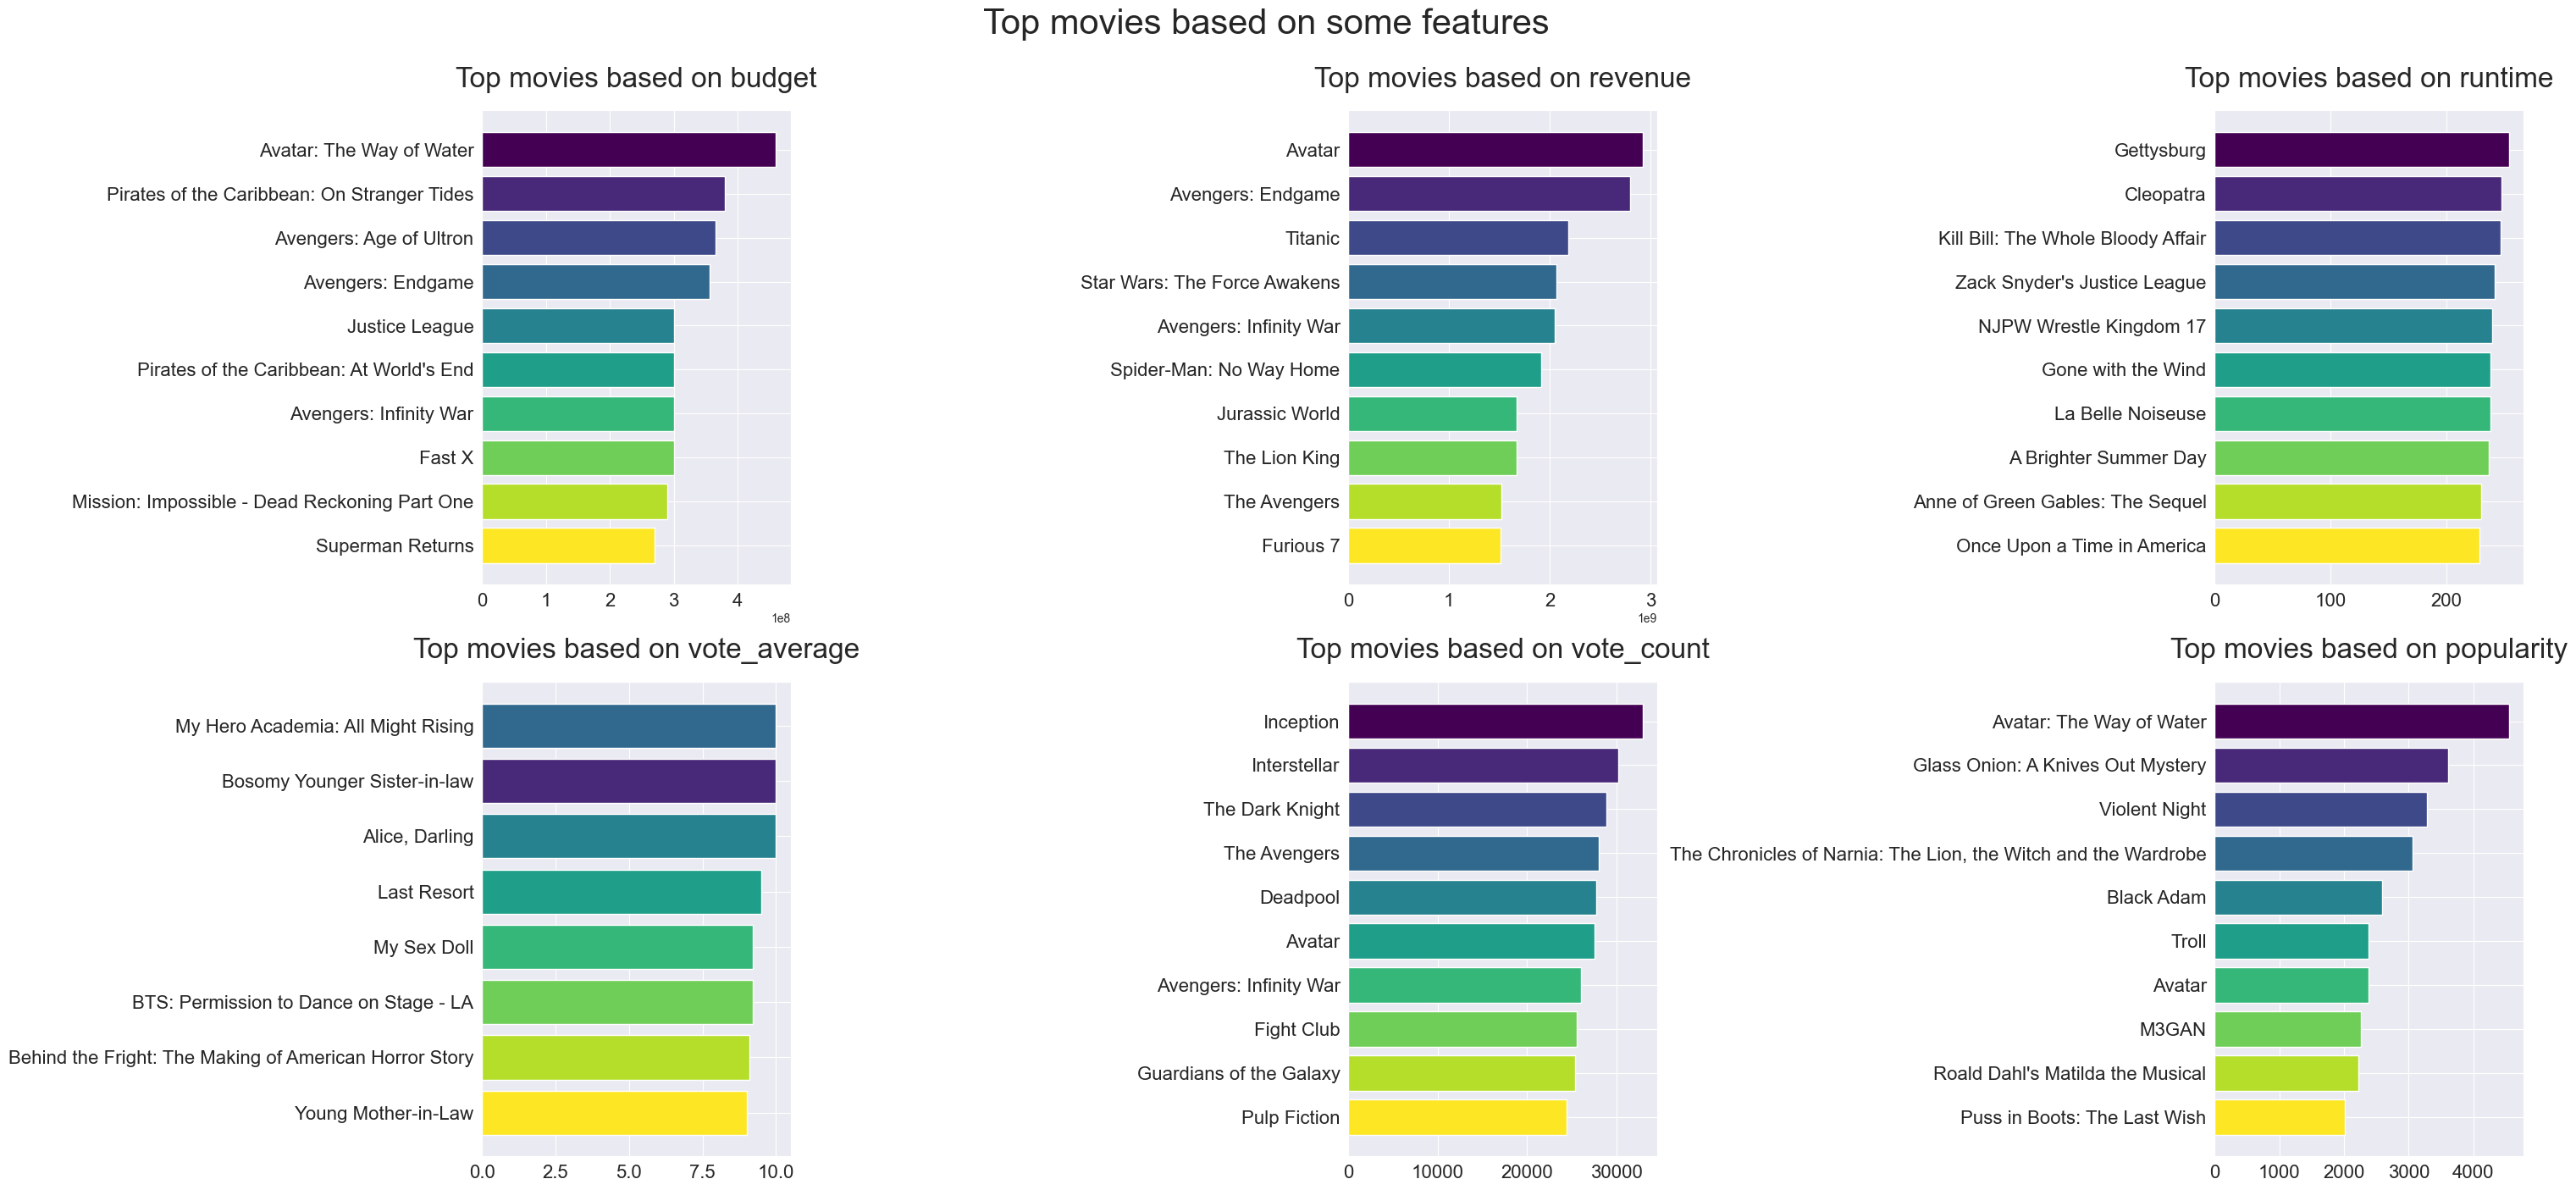

In [244]:
import matplotlib
import matplotlib.pyplot as plt

# Number of top movies to be plotted
top_movie_num = 10

# Features to plot the top movies based on
top_movies_based_on = ["budget", "revenue", "runtime", "vote_average", "vote_count", "popularity"]

# Create a figure and axes object for subplots
fig, ax = plt.subplots(len(top_movies_based_on)//3, 3, figsize=(30,14))

# Define a color map with `top_movie_num` colors
colors = plt.cm.get_cmap('viridis', top_movie_num)

# Iterate through each feature and plot top movies based on that feature
for i, col in enumerate(top_movies_based_on):
    # Get top `top_movie_num` movies based on `col` feature
    top_movies_by = movies_df.sort_values(by=[col], ascending=False).head(top_movie_num)

    # Calculate row and column number for subplot
    r, c = i//3, i%3

    # Plot top movies as horizontal bar chart in subplot
    ax[r][c].barh(top_movies_by["title"], top_movies_by[col], color=colors.colors)

    # Set title for subplot
    ax[r][c].set_title(f"Top movies based on {col}", fontsize=24, pad=20)

    # Set font size for tick labels
    ax[r][c].tick_params(axis='both', which='major', labelsize=16)

    # Invert y-axis so that the titles appear right-side up
    ax[r][c].invert_yaxis()

# Set super title for entire figure
plt.suptitle('Top movies based on some features',fontsize=30, y=1)

# Adjust spacing between subplots
fig.tight_layout()


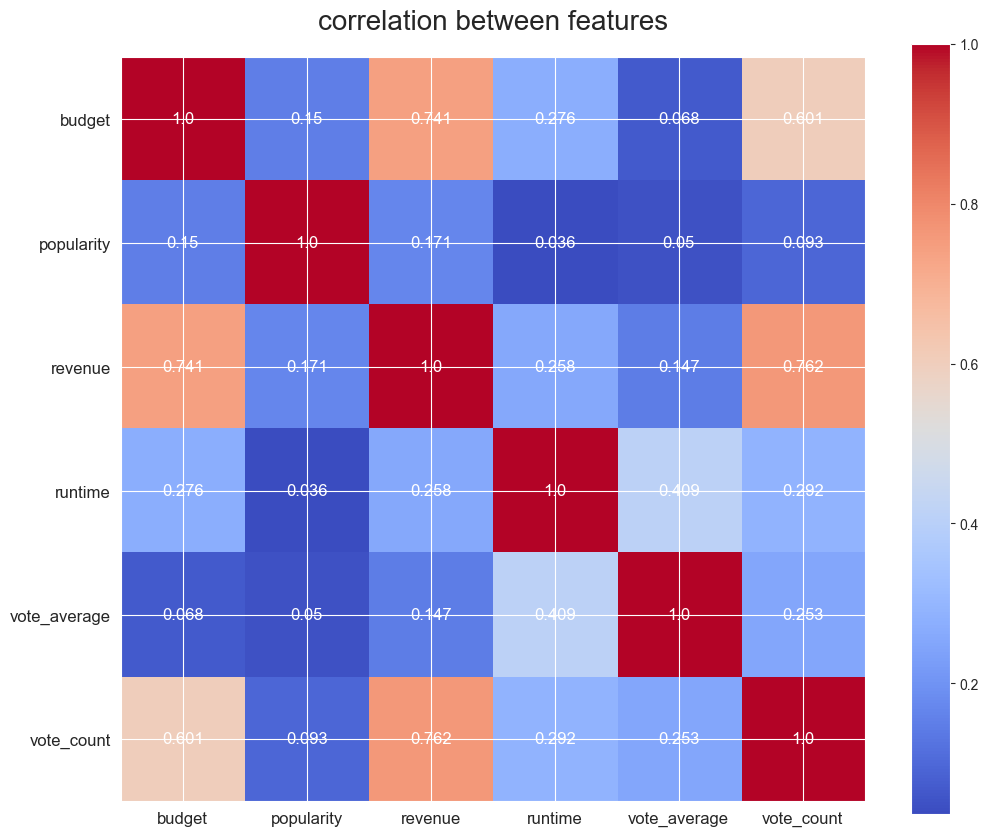

In [245]:
matrix = movies_df[["budget", "popularity", "revenue", "runtime", "vote_average", "vote_count"]].corr()

f, ax = plt.subplots(figsize=(12, 10))
plt.title("correlation between features", fontsize=20, pad=20)
plt.xticks(range(len(matrix.index)), matrix.index, fontsize=12)
plt.yticks(range(len(matrix.index)), matrix.index, fontsize=12)

# adding values
for i in range(len(matrix.index)):
    for j in range(len(matrix.index)):
        text = ax.text(j, i, round(matrix.iloc[i, j],3), ha="center", va="center", color="w", fontsize=12)

plt.imshow(matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar();

In [246]:
#selecting the columns that are needed
movies_df = movies_df[['movie_id','title','overview','genres','keywords','cast','crew','vote_count','vote_average']]
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      10000 non-null  int64  
 1   title         10000 non-null  object 
 2   overview      9915 non-null   object 
 3   genres        10000 non-null  object 
 4   keywords      10000 non-null  object 
 5   cast          10000 non-null  object 
 6   crew          10000 non-null  object 
 7   vote_count    10000 non-null  int64  
 8   vote_average  10000 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 703.2+ KB


In [247]:
movies_df.head(5)

,movie_id,title,overview,genres,keywords,cast,crew,vote_count,vote_average
0,76600,Avatar: The Way of Water,Set more than a decade after the events of the...,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...","[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 1721, 'kn...",3655,7.711
1,661374,Glass Onion: A Knives Out Mystery,World-famous detective Benoit Blanc heads to G...,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...","[{'id': 703, 'name': 'detective'}, {'id': 1200...","[{'adult': False, 'gender': 2, 'id': 8784, 'kn...","[{'adult': False, 'gender': 2, 'id': 1226, 'kn...",2204,7.083
2,899112,Violent Night,When a team of mercenaries breaks into a wealt...,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...","[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[{'adult': False, 'gender': 2, 'id': 35029, 'k...","[{'adult': False, 'gender': 2, 'id': 6114, 'kn...",805,7.742
3,411,"The Chronicles of Narnia: The Lion, the Witch ...","Siblings Lucy, Edmund, Susan and Peter step th...","[{'id': 12, 'name': 'Adventure'}, {'id': 10751...","[{'id': 83, 'name': 'saving the world'}, {'id'...","[{'adult': False, 'gender': 2, 'id': 5527, 'kn...","[{'adult': False, 'gender': 2, 'id': 1095, 'kn...",9108,7.108
4,436270,Black Adam,"Nearly 5,000 years after he was bestowed with ...","[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...","[{'id': 952, 'name': 'lightning'}, {'id': 2095...","[{'adult': False, 'gender': 2, 'id': 18918, 'k...","[{'adult': False, 'gender': 2, 'id': 3687, 'kn...",3544,7.216


In [248]:
#checking the total sum of null values in the dataset
movies_df.isnull().sum()

movie_id         0
title            0
overview        85
genres           0
keywords         0
cast             0
crew             0
vote_count       0
vote_average     0
dtype: int64

In [249]:
#dropping the rows of the overview column
movies_df.dropna(inplace=True)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9915 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      9915 non-null   int64  
 1   title         9915 non-null   object 
 2   overview      9915 non-null   object 
 3   genres        9915 non-null   object 
 4   keywords      9915 non-null   object 
 5   cast          9915 non-null   object 
 6   crew          9915 non-null   object 
 7   vote_count    9915 non-null   int64  
 8   vote_average  9915 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 774.6+ KB


In [250]:
#checking for duplicates
movies_df.duplicated().sum()


1028

In [251]:
movies_df.drop_duplicates(inplace=True)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      8887 non-null   int64  
 1   title         8887 non-null   object 
 2   overview      8887 non-null   object 
 3   genres        8887 non-null   object 
 4   keywords      8887 non-null   object 
 5   cast          8887 non-null   object 
 6   crew          8887 non-null   object 
 7   vote_count    8887 non-null   int64  
 8   vote_average  8887 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 694.3+ KB


Preprocessing the genres column

In [252]:
movies_df.head(10)

,movie_id,title,overview,genres,keywords,cast,crew,vote_count,vote_average
0,76600,Avatar: The Way of Water,Set more than a decade after the events of the...,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...","[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 1721, 'kn...",3655,7.711
1,661374,Glass Onion: A Knives Out Mystery,World-famous detective Benoit Blanc heads to G...,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...","[{'id': 703, 'name': 'detective'}, {'id': 1200...","[{'adult': False, 'gender': 2, 'id': 8784, 'kn...","[{'adult': False, 'gender': 2, 'id': 1226, 'kn...",2204,7.083
2,899112,Violent Night,When a team of mercenaries breaks into a wealt...,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...","[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[{'adult': False, 'gender': 2, 'id': 35029, 'k...","[{'adult': False, 'gender': 2, 'id': 6114, 'kn...",805,7.742
3,411,"The Chronicles of Narnia: The Lion, the Witch ...","Siblings Lucy, Edmund, Susan and Peter step th...","[{'id': 12, 'name': 'Adventure'}, {'id': 10751...","[{'id': 83, 'name': 'saving the world'}, {'id'...","[{'adult': False, 'gender': 2, 'id': 5527, 'kn...","[{'adult': False, 'gender': 2, 'id': 1095, 'kn...",9108,7.108
4,436270,Black Adam,"Nearly 5,000 years after he was bestowed with ...","[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...","[{'id': 952, 'name': 'lightning'}, {'id': 2095...","[{'adult': False, 'gender': 2, 'id': 18918, 'k...","[{'adult': False, 'gender': 2, 'id': 3687, 'kn...",3544,7.216
5,736526,Troll,"Deep inside the mountain of Dovre, something g...","[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...","[{'id': 1262, 'name': 'mountain'}, {'id': 5457...","[{'adult': False, 'gender': 1, 'id': 1394758, ...","[{'adult': False, 'gender': 2, 'id': 20308, 'k...",940,6.647
6,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 1721, 'kn...",27566,7.558
7,536554,M3GAN,A brilliant toy company roboticist uses artifi...,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...","[{'id': 9707, 'name': 'evil doll'}, {'id': 123...","[{'adult': False, 'gender': 1, 'id': 1255540, ...","[{'adult': False, 'gender': 1, 'id': 494, 'kno...",91,7.110
8,668482,Roald Dahl's Matilda the Musical,An extraordinary young girl discovers her supe...,"[{'id': 10751, 'name': 'Family'}, {'id': 35, '...","[{'id': 291, 'name': 'circus'}, {'id': 295, 'n...","[{'adult': False, 'gender': 1, 'id': 2442117, ...","[{'adult': False, 'gender': 2, 'id': 463, 'kno...",255,6.822
9,740952,Savage Salvation,Newly engaged Shelby John and Ruby Red want a ...,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...","[{'id': 9748, 'name': 'revenge'}, {'id': 15593...","[{'adult': False, 'gender': 2, 'id': 54738, 'k...","[{'adult': False, 'gender': 2, 'id': 17210, 'k...",24,5.500


In [253]:
movies_df.iloc[0].genres

"[{'id': 878, 'name': 'Science Fiction'}, {'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}]"

In [254]:
#Since genres are in string format, i will need to convert them , for further processing using the ast library to return a list of the genres

import ast
def process(genre):
    final = []
    for i in ast.literal_eval(genre):
        final.append(i['name'])
    return final

In [255]:
movies_df['genres']=movies_df['genres'].apply(process)
movies_df.head(10)

,movie_id,title,overview,genres,keywords,cast,crew,vote_count,vote_average
0,76600,Avatar: The Way of Water,Set more than a decade after the events of the...,"[Science Fiction, Adventure, Action]","[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 1721, 'kn...",3655,7.711
1,661374,Glass Onion: A Knives Out Mystery,World-famous detective Benoit Blanc heads to G...,"[Mystery, Thriller, Comedy]","[{'id': 703, 'name': 'detective'}, {'id': 1200...","[{'adult': False, 'gender': 2, 'id': 8784, 'kn...","[{'adult': False, 'gender': 2, 'id': 1226, 'kn...",2204,7.083
2,899112,Violent Night,When a team of mercenaries breaks into a wealt...,"[Action, Comedy, Crime, Thriller]","[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[{'adult': False, 'gender': 2, 'id': 35029, 'k...","[{'adult': False, 'gender': 2, 'id': 6114, 'kn...",805,7.742
3,411,"The Chronicles of Narnia: The Lion, the Witch ...","Siblings Lucy, Edmund, Susan and Peter step th...","[Adventure, Family, Fantasy]","[{'id': 83, 'name': 'saving the world'}, {'id'...","[{'adult': False, 'gender': 2, 'id': 5527, 'kn...","[{'adult': False, 'gender': 2, 'id': 1095, 'kn...",9108,7.108
4,436270,Black Adam,"Nearly 5,000 years after he was bestowed with ...","[Action, Fantasy, Science Fiction]","[{'id': 952, 'name': 'lightning'}, {'id': 2095...","[{'adult': False, 'gender': 2, 'id': 18918, 'k...","[{'adult': False, 'gender': 2, 'id': 3687, 'kn...",3544,7.216
5,736526,Troll,"Deep inside the mountain of Dovre, something g...","[Fantasy, Action, Adventure]","[{'id': 1262, 'name': 'mountain'}, {'id': 5457...","[{'adult': False, 'gender': 1, 'id': 1394758, ...","[{'adult': False, 'gender': 2, 'id': 20308, 'k...",940,6.647
6,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 1721, 'kn...",27566,7.558
7,536554,M3GAN,A brilliant toy company roboticist uses artifi...,"[Horror, Science Fiction, Thriller]","[{'id': 9707, 'name': 'evil doll'}, {'id': 123...","[{'adult': False, 'gender': 1, 'id': 1255540, ...","[{'adult': False, 'gender': 1, 'id': 494, 'kno...",91,7.110
8,668482,Roald Dahl's Matilda the Musical,An extraordinary young girl discovers her supe...,"[Family, Comedy, Fantasy]","[{'id': 291, 'name': 'circus'}, {'id': 295, 'n...","[{'adult': False, 'gender': 1, 'id': 2442117, ...","[{'adult': False, 'gender': 2, 'id': 463, 'kno...",255,6.822
9,740952,Savage Salvation,Newly engaged Shelby John and Ruby Red want a ...,"[Action, Thriller, Crime, Drama]","[{'id': 9748, 'name': 'revenge'}, {'id': 15593...","[{'adult': False, 'gender': 2, 'id': 54738, 'k...","[{'adult': False, 'gender': 2, 'id': 17210, 'k...",24,5.500


Visualizing the genres

(0.0, 100.0, 0.0, 100.0)

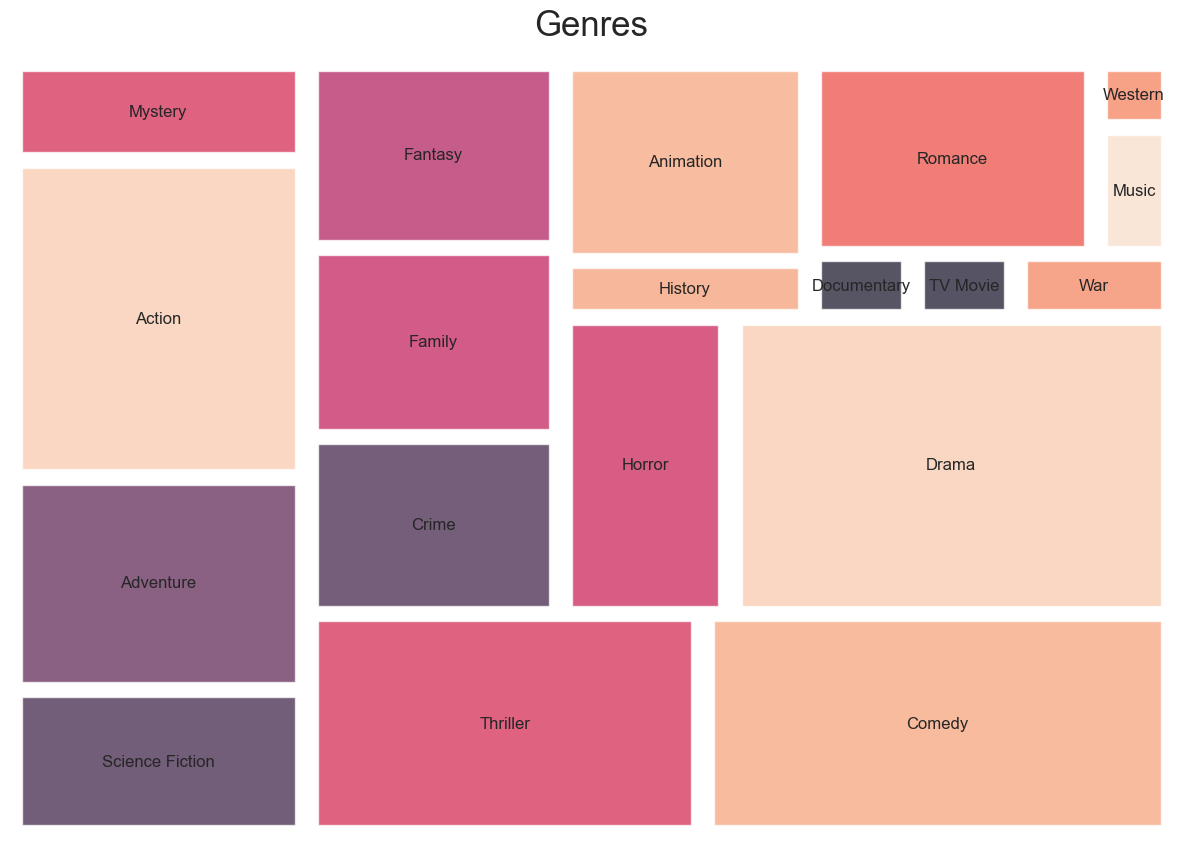

In [256]:
# import libraries
from collections import defaultdict, Counter
import squarify

# gather genres information and create Counter object
genres_flatten = sum(movies_df["genres"].values, []) # flatten genres column (list of lists) to single list
genres_info = Counter(genres_flatten) # count frequency of each genre

# create a figure and label with title
plt.figure(figsize=(15, 10))
plt.title("Genres", fontsize=25, pad=20)

# plot genre frequency using squarify
squarify.plot(genres_info.values(), label=genres_info.keys(), text_kwargs={'fontsize':12}, bar_kwargs={'alpha':.7}, pad=True)

# turn off axis for clear view
plt.axis("off")


In [257]:
#convert keywords to return list of keywords
movies_df['keywords']=movies_df['keywords'].apply(process)
movies_df.head(10)

,movie_id,title,overview,genres,keywords,cast,crew,vote_count,vote_average
0,76600,Avatar: The Way of Water,Set more than a decade after the events of the...,"[Science Fiction, Adventure, Action]","[loss of loved one, dying and death, alien lif...","[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 1721, 'kn...",3655,7.711
1,661374,Glass Onion: A Knives Out Mystery,World-famous detective Benoit Blanc heads to G...,"[Mystery, Thriller, Comedy]","[detective, greece, investigation, satire, seq...","[{'adult': False, 'gender': 2, 'id': 8784, 'kn...","[{'adult': False, 'gender': 2, 'id': 1226, 'kn...",2204,7.083
2,899112,Violent Night,When a team of mercenaries breaks into a wealt...,"[Action, Comedy, Crime, Thriller]","[holiday, santa claus, mercenary, saving chris...","[{'adult': False, 'gender': 2, 'id': 35029, 'k...","[{'adult': False, 'gender': 2, 'id': 6114, 'kn...",805,7.742
3,411,"The Chronicles of Narnia: The Lion, the Witch ...","Siblings Lucy, Edmund, Susan and Peter step th...","[Adventure, Family, Fantasy]","[saving the world, sibling relationship, witch...","[{'adult': False, 'gender': 2, 'id': 5527, 'kn...","[{'adult': False, 'gender': 2, 'id': 1095, 'kn...",9108,7.108
4,436270,Black Adam,"Nearly 5,000 years after he was bestowed with ...","[Action, Fantasy, Science Fiction]","[lightning, anti hero, superhero, based on com...","[{'adult': False, 'gender': 2, 'id': 18918, 'k...","[{'adult': False, 'gender': 2, 'id': 3687, 'kn...",3544,7.216
5,736526,Troll,"Deep inside the mountain of Dovre, something g...","[Fantasy, Action, Adventure]","[mountain, mythical creature, creature, norweg...","[{'adult': False, 'gender': 1, 'id': 1394758, ...","[{'adult': False, 'gender': 2, 'id': 20308, 'k...",940,6.647
6,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 1721, 'kn...",27566,7.558
7,536554,M3GAN,A brilliant toy company roboticist uses artifi...,"[Horror, Science Fiction, Thriller]","[evil doll, aunt niece relationship, orphan, c...","[{'adult': False, 'gender': 1, 'id': 1255540, ...","[{'adult': False, 'gender': 1, 'id': 494, 'kno...",91,7.110
8,668482,Roald Dahl's Matilda the Musical,An extraordinary young girl discovers her supe...,"[Family, Comedy, Fantasy]","[circus, library, corruption, child abuse, mag...","[{'adult': False, 'gender': 1, 'id': 2442117, ...","[{'adult': False, 'gender': 2, 'id': 463, 'kno...",255,6.822
9,740952,Savage Salvation,Newly engaged Shelby John and Ruby Red want a ...,"[Action, Thriller, Crime, Drama]","[revenge, recovering addict, police pursuit, o...","[{'adult': False, 'gender': 2, 'id': 54738, 'k...","[{'adult': False, 'gender': 2, 'id': 17210, 'k...",24,5.500


KEYWORDS VISUALIZATION

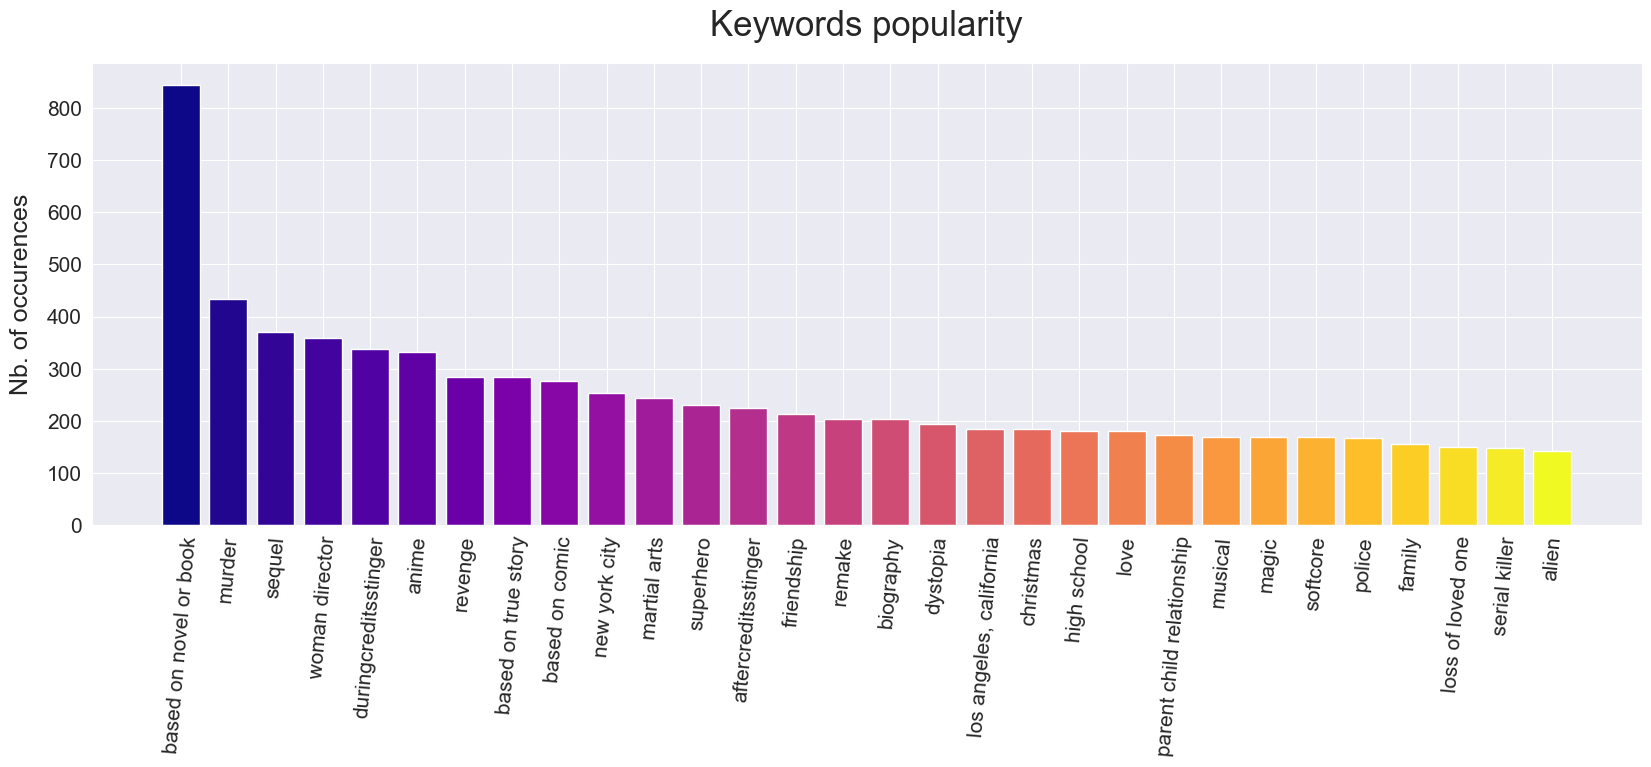

In [258]:
# Set the number of top keywords to display
top_keywords_num = 30

# Flatten the list of lists of keywords into a single list
keywords_flatten = sum(movies_df["keywords"].values, [])

# Count the frequency of each keyword
keywords_info = Counter(keywords_flatten)

# Get the top `top_keywords_num` keywords and store them in a dictionary
top_keywords = dict(keywords_info.most_common(top_keywords_num))

# Plot the frequency of the top keywords using a bar plot
plt.figure(figsize=(20, 6))
plt.xticks(rotation=85, fontsize=15) # rotate the x-axis labels by 85 degrees and set the font size to 15
plt.yticks(fontsize=15) # set the font size of y-axis labels to 15
plt.ylabel("Nb. of occurences", fontsize=18, labelpad=10) # set the y-axis label, font size, and label padding
plt.bar(top_keywords.keys(), top_keywords.values(), align='center', color=plt.cm.get_cmap('plasma', top_keywords_num).colors) # plot the bar plot with the keyword names on x-axis and the frequency on y-axis
plt.title("Keywords popularity", fontsize=25, pad=20) # set the title of the plot with font size 25 and padding 20
plt.show() # display the plot

In [259]:
#same thing to cast and crews
movies_df['cast']=movies_df['cast'].apply(process)
movies_df['crew']=movies_df['crew'].apply(process)
movies_df.head(10)

KeyboardInterrupt: 

In [ ]:
#overview is in string format so we will be converting it into list
movies_df['overview'] = movies_df['overview'].apply(lambda x:x.split())
movies_df.head(10)

In [ ]:
#removing spaces in between words
movies_df['genres'] = movies_df['genres'].apply(lambda x:[i.replace(" ", "") for i in x])

In [ ]:
movies_df['keywords'] = movies_df['keywords'].apply(lambda x:[i.replace(" ", "") for i in x])

In [ ]:
movies_df['cast'] = movies_df['cast'].apply(lambda x:[i.replace(" ", "") for i in x])

In [ ]:
movies_df['crew'] = movies_df['crew'].apply(lambda x:[i.replace(" ", "") for i in x])

In [ ]:
movies_df.head(20)

CREATING A METADATA COLUMN WITH ALL THE TAGS OF THE MOVIES

In [ ]:
#creating a metadata column with all the tags of the movies
movies_df['metadata'] = movies_df['overview'] + movies_df['genres'] + movies_df['keywords'] + movies_df['cast'] + movies_df['crew']

In [ ]:
movies_df.head(10)


In [ ]:
#create a new df
movies_df_new = movies_df[['movie_id','title','metadata']]

In [ ]:
movies_df_new

In [ ]:
#convert the metadata column to string
movies_df_new['metadata'] = movies_df_new['metadata'].apply(lambda x:" ".join(x))


In [ ]:
movies_df_new['metadata'][0]